In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras_facenet import FaceNet
from dnn_face_detection import detect_face
from sklearn.metrics.pairwise import cosine_similarity 

2022-11-18 14:26:15.443716: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 14:26:15.665518: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-18 14:26:15.753791: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 14:26:16.508896: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
img1 = cv2.imread("dataset/2.jpg")
img2 = cv2.imread("dataset/images.jpeg")

In [10]:
def plot_img(img):
    # plt.imshow(img)

    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

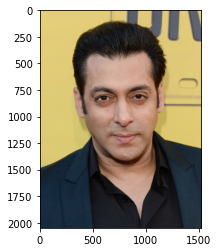

In [4]:
plot_img(img1)

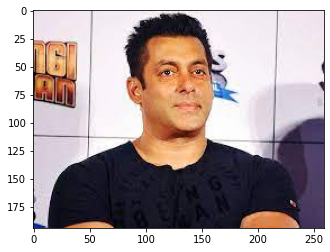

In [5]:
plot_img(img2)

In [6]:
def face_detection(img):
    faces = detect_face(img)
    print(faces)
    for bounding_box in faces:

        x = int(bounding_box[0])
        y = int(bounding_box[1])
        x2 = int(bounding_box[2])
        y2 = int(bounding_box[3])
        print(x,y,x2,y2)
        crop_face = img[y:y2,x:x2] # croping face
        crop_face = cv2.resize(crop_face,(160,160)) # resize image 160,160 facenet input shape 
        return crop_face


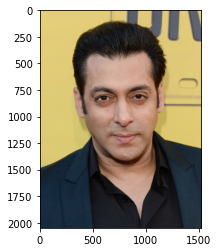

In [11]:
plot_img(img1)

In [12]:
img1_face = face_detection(img1)
img2_face = face_detection(img2)

[[ 421.13  385.04 1118.15 1421.63]]
421 385 1118 1421
[[ 98.64  20.36 159.52 107.23]]
98 20 159 107


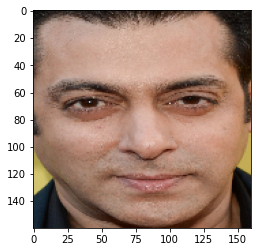

In [13]:
plot_img(img1_face)

# Initializing facenet model

In [14]:
embedeer  = FaceNet()

2022-11-18 15:09:00.603058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 15:09:00.673935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 15:09:00.674095: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-18 15:09:00.674600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [18]:
embeding1 = embedeer.embeddings(np.expand_dims(img1_face,axis=0))
embeding2 = embedeer.embeddings(np.expand_dims(img2_face,axis=0))
embeding2.shape

1/1 [==============================] - 0s 21ms/step


(1, 512)

In [19]:
similarity_score = cosine_similarity(embeding1,embeding2)
similarity_score

array([[0.7578323]], dtype=float32)